In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from skimage.io import imread
from skimage.util import img_as_float


In [ ]:
image = imread('bird.png')
normalized_image = img_as_float(image)

In [ ]:
def plot_colour_space(RGB, title=None, hold=False, **kwargs):
    """
    Plots Nx3 matrix RGB in 3 dimensions.
    The "RGB" input should have the shape [F, 3], where F is the total number of pixels in the image.
    F can be obtained by reshaping the original image using image.reshape(-1, 3).
    The keyword arguments are passed to Matplotlib's scatter() function.
    If hold=True, the points will be added to the previous plot. Otherwise, a new plot is generated.
    """
    if hold:
        ax = plt.gca()
    else:
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')
    kwargs.setdefault('alpha', 1.0)
    ax.scatter(*RGB.T, **kwargs)
    ax.set_xlabel('R', color='r', fontweight='bold', fontsize=15)
    ax.set_ylabel('G', color='g', fontweight='bold', fontsize=15)
    ax.set_zlabel('B', color='b', fontweight='bold', fontsize=15)
    if title is not None:
        ax.set_title(title)



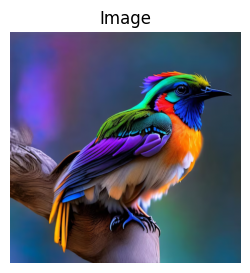

In [ ]:
plt.figure(figsize=(3, 3))
plt.imshow(normalized_image)
plt.title("Image")
plt.axis('off')
plt.show()

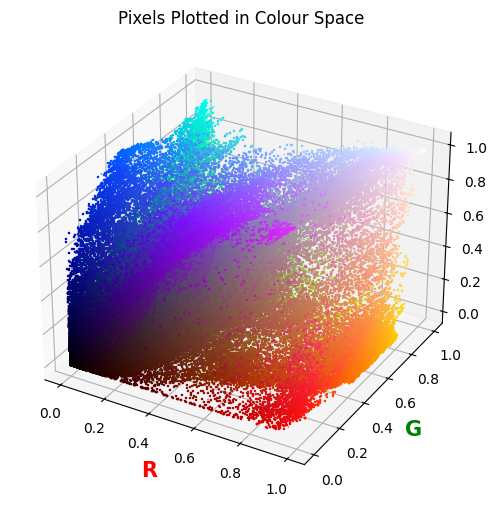

In [ ]:
reshaped_image = normalized_image.reshape(-1, 3)
plot_colour_space(reshaped_image, c=reshaped_image, s=0.5, marker='s', title="Pixels Plotted in Colour Space")

def apply_kmeans_and_visualize(image, k, title_prefix=""):
    reshaped_image = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reshaped_image)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    plot_colour_space(centroids, c=centroids, s=200, marker='o', title=f"{title_prefix} Colour Space with Centroids (K={k})")
    recolored_image = centroids[labels].reshape(image.shape)
    plt.figure(figsize=(6, 6))
    plt.imshow(recolored_image)
    plt.title(f"Recolored Image (K={k})")
    plt.axis('off')
    plt.show()

    return recolored_image, centroids


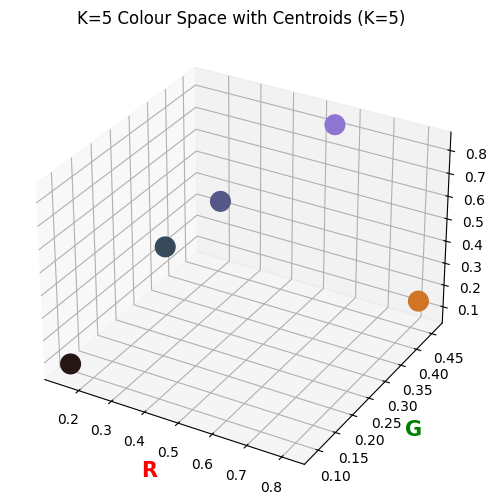

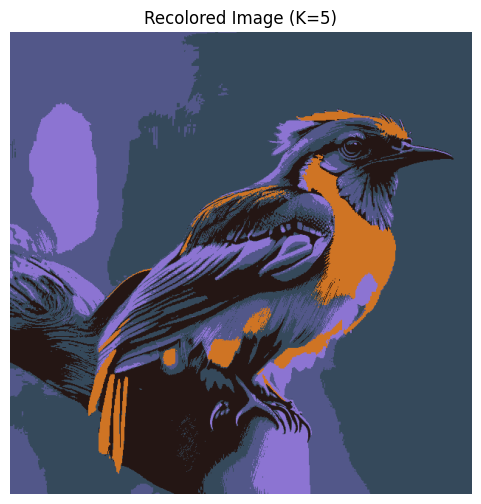

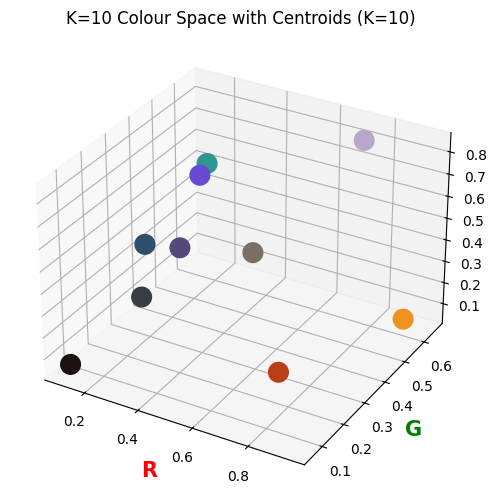

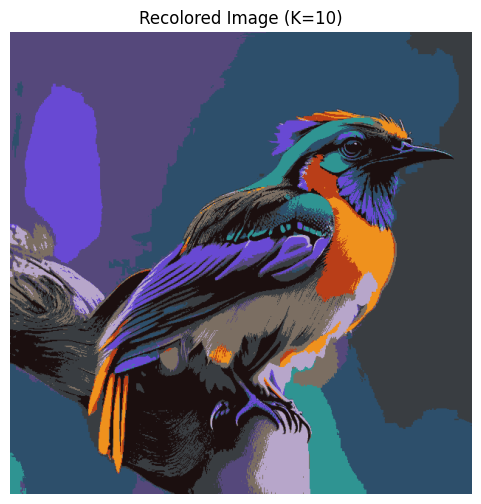

MSE for K=5: 0.011027
MSE for K=10: 0.006117


In [ ]:
recolored_images = {}
for k in [5, 10]:
    recolored_image, centroids = apply_kmeans_and_visualize(normalized_image, k, title_prefix=f"K={k}")
    recolored_images[k] = recolored_image

for k, recolored_image in recolored_images.items():
    mse = mean_squared_error(normalized_image.flatten(), recolored_image.flatten())
    print(f"MSE for K={k}: {mse:.6f}")

K=5 balances detail and simplicity with an MSE of 0.011027, suitable for compressed representations. K=10 achieves better detail with a lower MSE of 0.006117 but increases complexity. As K values
increase it improve accuracy at the cost of efficiency.